# Final Notebook (Presentation)

In [15]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

# Introduction

Our group covered metrics which regarded the safety of each neighborhood in Pittsburgh. The submetrics included are fires in the area, firearm seizures, and arrest data. 

We searched for data which regarded how safe each neighborhood was, and we compared them against each other. The more dangerous events the neighborhood had, the more unsafe it was. In regards to the data, we also made sure the datasets included the neighborhood names, relevant data to our main topic, and data which is easily feasible. 

We based our main metric on the three submetrics we came up with. Which is how we solidified our datasets and used them to create our dataframs. 

# Data Frames

In [6]:
firedata = pd.read_csv("firedata.csv") 
firedata.groupby("neighborhood").count()

,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,,,,,
Allegheny Center,56,55,56,56,55,56,56,55,56,56,56,56,56,56,56,53,53
Allegheny West,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,38,38
Allentown,115,115,115,115,115,115,115,115,115,115,115,115,115,115,115,112,112
Arlington,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45
Arlington Heights,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44
West End,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
West Oakland,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57


In [7]:
# Get the value counts (number of entries) per each neighborhood. From here we can see that there are 
# 91 neighborhoods considered by the dataset.

fire_series = firedata["neighborhood"].value_counts()

fire_series

Carrick                      262
Squirrel Hill South          233
Central Business District    232
South Side Flats             225
Hazelwood                    217
                            ... 
St. Clair                     11
East Carnegie                 11
Mt. Oliver                    11
Regent Square                  7
Mount Oliver Borough           6
Name: neighborhood, Length: 91, dtype: int64

In [20]:
# That's a lot of neighborhoods to contend with. Maybe we just want to see where the highest 
# number of fire incidents are. Create a new series that ends at the median neighborhood for this
# dataset.

fire_series_filtered = fire_series.iloc[:int(fire_series.size / 2)]
fire_series_filtered.head(15)

Carrick                      262
Squirrel Hill South          233
Central Business District    232
South Side Flats             225
Hazelwood                    217
East Liberty                 188
Mount Washington             183
Lincoln-Lemington-Belmar     177
Homewood South               174
Homewood North               171
Brookline                    163
Shadyside                    157
Sheraden                     156
Knoxville                    156
Perry South                  151
Name: neighborhood, dtype: int64

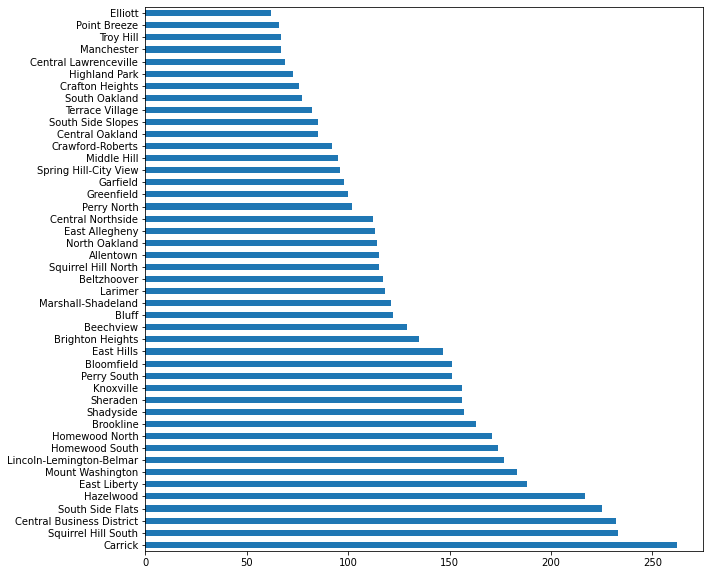

In [9]:
# Plot the data and change the size to make it legible. Boom! Don't move to Carrick if you're flammable. 
fire_series_filtered.plot(kind="barh",figsize=(10,10))

In [10]:
data = pd.read_csv('Firearms.csv',index_col = 'address',parse_dates = True)
data.head(5)

,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,neighborhood,council_district,ward,tract,public_works_division,police_zone,fire_zone,latitude,longitude
address,,,,,,,,,,,,,,,,,,
"1700 BLOCK ARLINGTON AVE PITTSBURGH, PA 15210",2,0,1,1,0,0,2015,1,0,Mount Oliver Borough,3.0,0.0,4.200317e+10,0.0,3,4-6,40.417619,-79.986436
"BREVET WAY & MINTON ST PITTSBURGH, PA 15204",1,0,1,0,0,0,2015,1,0,Sheraden,2.0,20.0,4.200356e+10,5.0,6,1-16,40.456904,-80.052328
"TERRACE ST & WHITRIDGE ST PITTSBURGH, PA 15213",1,0,1,0,0,0,2015,1,0,Terrace Village,6.0,4.0,4.200305e+10,3.0,2,2-10,40.441185,-79.968527
"3500 BLOCK GERBER AVE PITTSBURGH, PA 15212",1,0,1,0,0,0,2015,1,0,Brighton Heights,1.0,27.0,4.200327e+10,1.0,1,1-14,40.479530,-80.033477
"7500 BLOCK KELLY ST PITTSBURGH, PA 15208",1,0,1,0,0,0,2015,1,0,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN


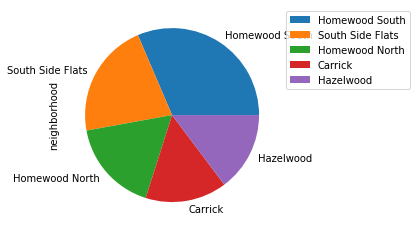

In [11]:
data['neighborhood'].value_counts().sort_values(ascending=False).head().plot(kind = 'pie')
plt.legend(bbox_to_anchor=(1,1))

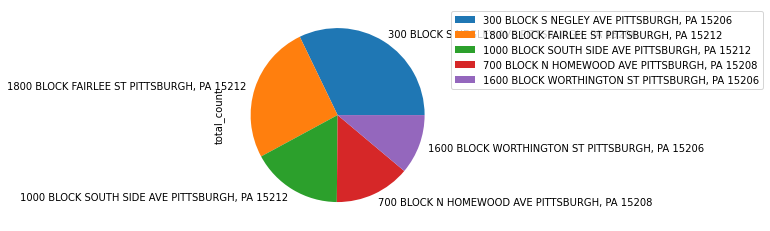

In [12]:
data['total_count'].sort_values(ascending = False).head().plot(kind='pie')
plt.legend(bbox_to_anchor=(1,1))

In [13]:
print('Total amount of pistols reported:', data['pistol_count'].sum())
print('Total amount of rifles reported:', data['rifle_count'].sum())

Total amount of pistols reported: 3899
Total amount of rifles reported: 384


In [14]:
data['total_count'].sort_values(ascending = False).head(5)

address
300 BLOCK S NEGLEY AVE PITTSBURGH, PA 15206       55
1800 BLOCK FAIRLEE ST PITTSBURGH, PA 15212        44
1000 BLOCK SOUTH SIDE AVE PITTSBURGH, PA 15212    29
700 BLOCK N HOMEWOOD AVE PITTSBURGH, PA 15208     24
1600 BLOCK WORTHINGTON ST PITTSBURGH, PA 15206    19
Name: total_count, dtype: int64

In [70]:
totals = data.groupby("neighborhood").sum()['total_count']
totals.sort_values(ascending=True).head()

neighborhood
Mt. Oliver        3
Regent Square     3
Swisshelm Park    3
Summer Hill       3
Oakwood           4
Name: total_count, dtype: int64

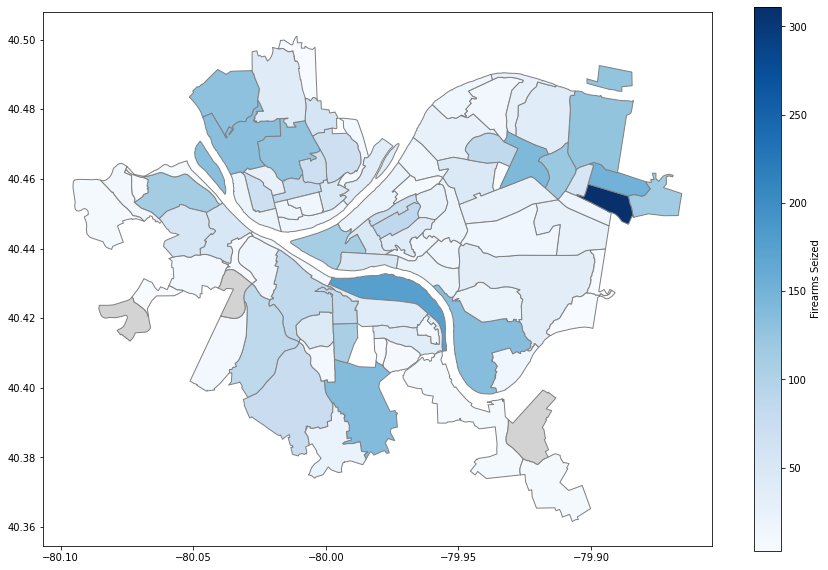

In [19]:
firearm_map = neighborhoods.merge(totals, how='left', left_on='hood', right_on='neighborhood')
firearm_map.plot(column='total_count', # set the data to be used for coloring
               cmap='Blues',              # choose a color palette
               edgecolor="grey",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Firearms Seized"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data as lightgrey
               )

In [21]:
arrest_data = pd.read_csv("arrest_data.csv")
arrest_data.head()

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


In [22]:
arrest_dict = dict()
for index, row in arrest_data.iterrows():
    neighborhood = row['INCIDENTNEIGHBORHOOD']
    if neighborhood not in arrest_dict:
        arrest_dict[neighborhood] = 1
    else:
        arrest_dict[neighborhood] += 1

In [32]:
population_data = pd.read_csv("population_data.csv")
population_data.head()

,Neighborhood,2010_Total_Population,2010_OneRace_Population,2010_White_Alone_Population,2010_Black_Alone_Population,2010_American_Indian_and_Alaska_Native_alone_population,2010_Asian_Alone_Population,2010_Native_Hawaiian_and_Other_Pacific_Islander_alone_Populatio,2010_Any_other_single_race_alone_Popualtion,2010_Population_two_or_more_races,...,Change_2010_to_2020_Total_Population,Change_2010_to_2020_OneRace_Population,Change_2010_to_2020_White_Alone_Population,Change_2010_to_2020_Black_Alone_Population,Change_2010_to_2020_American_Indian_and_Alaska_Native_alone_pop,Change_2010_to_2020_Asian_Alone_Population,Change_2010_to_2020_Native_Hawaiian_and_Other_Pacific_Islander_,Change_2010_to_2020_Any_other_single_race_alone_Popualtion,Change_2010_to_2020_Population_two_or_more_races,Change_2010_to_2020_Hispanic_or_Latino_Population
0,Allegheny Center,933,896,381,453,4,56,1,1,37,...,486,441,302,-63,4,179,0,19,45,23
1,Allegheny West,462,448,354,84,1,7,0,2,14,...,78,45,72,-52,0,9,1,15,33,28
2,Allentown,2500,2384,1485,878,9,1,0,11,116,...,-195,-258,-213,-93,-6,18,6,30,63,23
3,Arlington - Arlington Heights (Combined),2113,2042,1452,576,9,3,0,2,71,...,-73,-153,-246,44,-4,9,0,44,80,39
4,Banksville,4144,4053,3651,169,2,211,0,20,91,...,-17,-197,-460,25,5,174,2,57,180,102


In [90]:
#iterate through each neighborhood and get population data, as well as calculate ratio data
population_dict = dict()
arrest_ratio_dict = dict()
for index, row in population_data.iterrows():
    neighborhood = row['Neighborhood']
    population = row['2020_Total_Population']
    if neighborhood in arrest_dict:
        population_dict[neighborhood] = population
        arrest_ratio_dict[neighborhood] = (arrest_dict[neighborhood] / population) *10
#print(population_dict)
print(arrest_ratio_dict)

{'Allegheny Center': 7.145877378435518, 'Allegheny West': 2.0185185185185186, 'Allentown': 3.4793926247288502, 'Banksville': 0.5888054276714321, 'Bedford Dwellings': 3.8167388167388165, 'Beechview': 1.355976829910479, 'Beltzhoover': 2.711970074812968, 'Bloomfield': 0.9659549913444893, 'Bluff': 2.072424345460728, 'Bon Air': 2.859025032938076, 'Brighton Heights': 1.2962702322308233, 'Brookline': 0.8504937610043635, 'California-Kirkbride': 3.3709449929478135, 'Carrick': 1.9047619047619047, 'Central Lawrenceville': 0.798728813559322, 'Central Northside': 0.07738896366083445, 'Central Oakland': 0.7540702656383891, 'Chartiers City': 0.7113821138211383, 'Chateau': 190.0, 'Crafton Heights': 1.2003000750187547, 'Crawford-Roberts': 2.9873528129088527, 'Duquesne Heights': 0.7008760951188986, 'East Allegheny': 9.31686810299527, 'East Carnegie': 0.8961303462321791, 'East Hills': 3.2918395573997232, 'East Liberty': 2.477775981897527, 'Elliott': 2.4851801185590516, 'Esplen': 5.279503105590062, 'Fairy

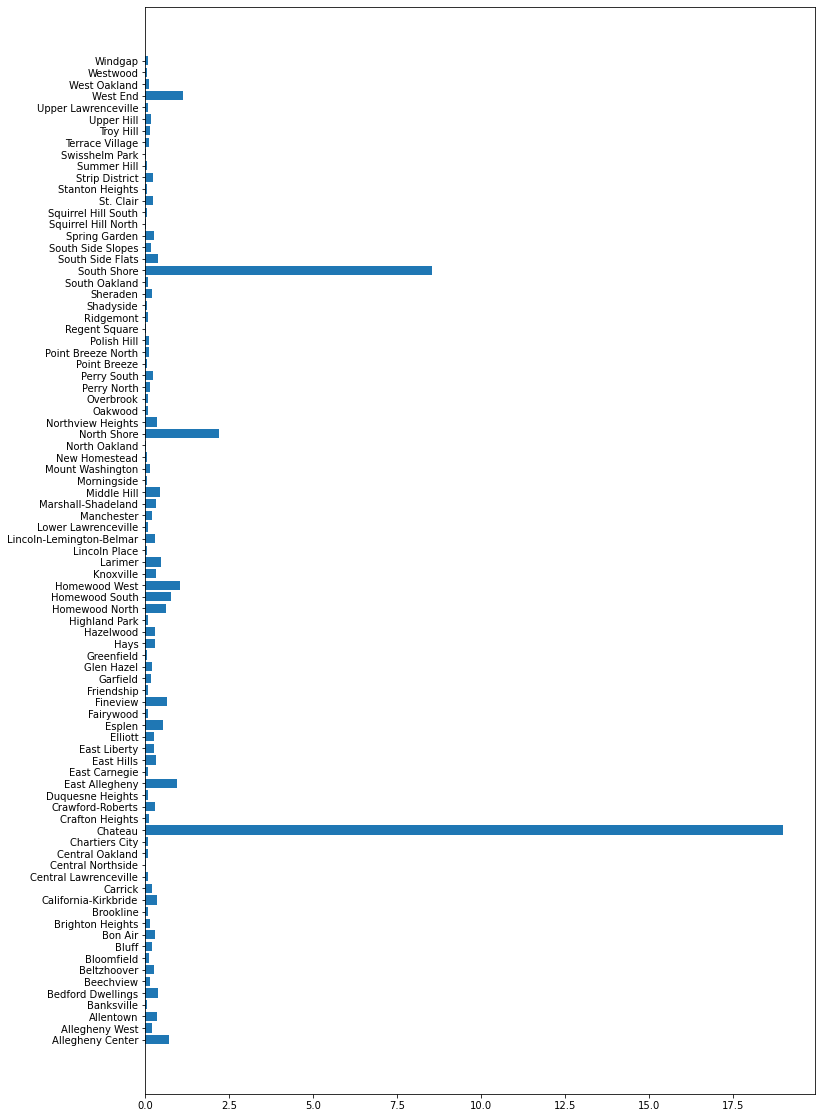

In [30]:
#now plot the data
neighborhoods = list(arrest_ratio_dict.keys())
arrest_ratio = list(arrest_ratio_dict.values())
mpl.barh(range(len(arrest_ratio_dict)), arrest_ratio, tick_label=neighborhoods )
mpl.rcParams["figure.figsize"]=(12, 20)
mpl.show()

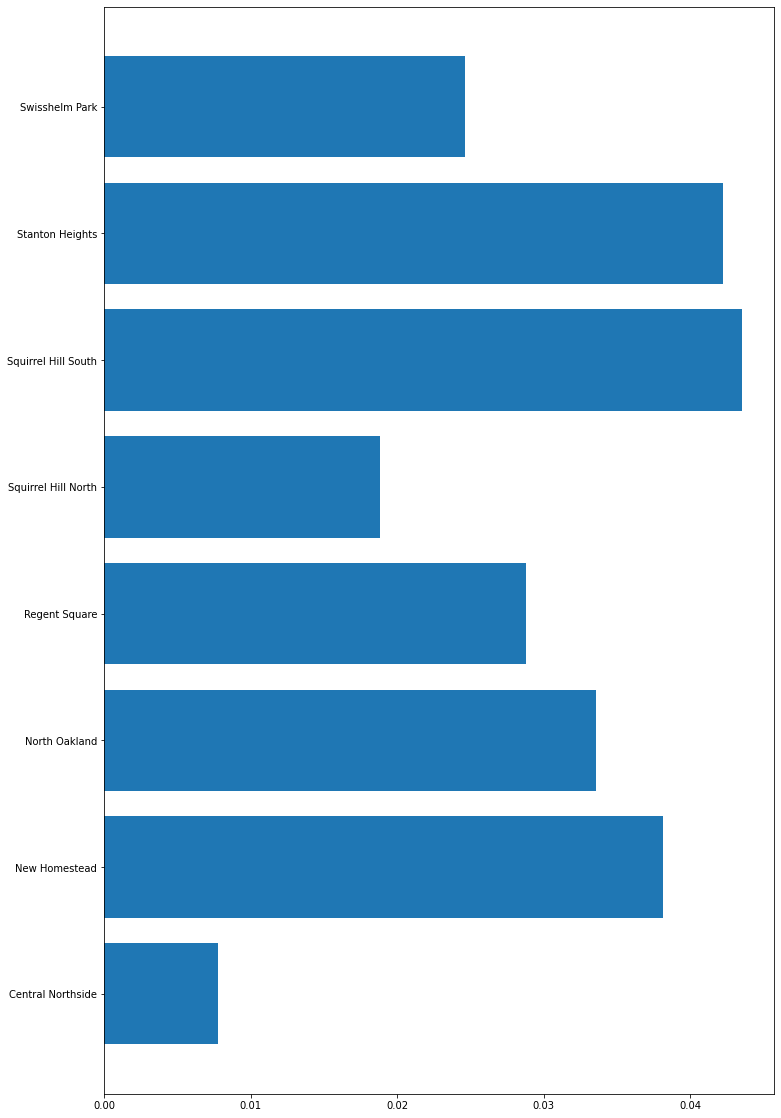

In [31]:
ratios_filtered = { key:value for (key,value) in arrest_ratio_dict.items() if value < 0.05}

neighborhoods = list(ratios_filtered.keys())
arrest_ratio = list(ratios_filtered.values())
mpl.barh(range(len(ratios_filtered)), arrest_ratio, tick_label=neighborhoods )
mpl.rcParams["figure.figsize"]=(12, 20)
mpl.show()

In [82]:
firearm_series = pd.Series(data.groupby('neighborhood').sum()['total_count'])
firearm_series.sort_values(ascending = True)
dictionary_data = dict()
firearm_series
    

neighborhood
Allegheny Center       15
Allegheny West         17
Allentown              86
Arlington              39
Arlington Heights      10
                       ..
Upper Lawrenceville    14
West End                5
West Oakland           14
Westwood               10
Windgap                13
Name: total_count, Length: 88, dtype: int64

In [92]:
arrest_series = pd.Series(arrest_ratio_dict)


In [116]:
series_test = fire_series + firearm_series
combined_series = series_test + arrest_series

combined_dataframe = pd.DataFrame(combined_series).reset_index()
# rename column [index -> neighborhood] & [0 -> rank]
combined_dataframe.rename(columns = {'index':'neighborhood', 0:'rank'}, inplace = True)


,neighborhood,rank
0,Allegheny Center,78.145877
1,Allegheny West,58.018519
2,Allentown,204.479393
3,Arlington,NaN
4,Arlington Heights,NaN
...,...,...
86,Upper Lawrenceville,58.672515
87,West End,35.365854
88,West Oakland,72.010260
89,Westwood,33.564226


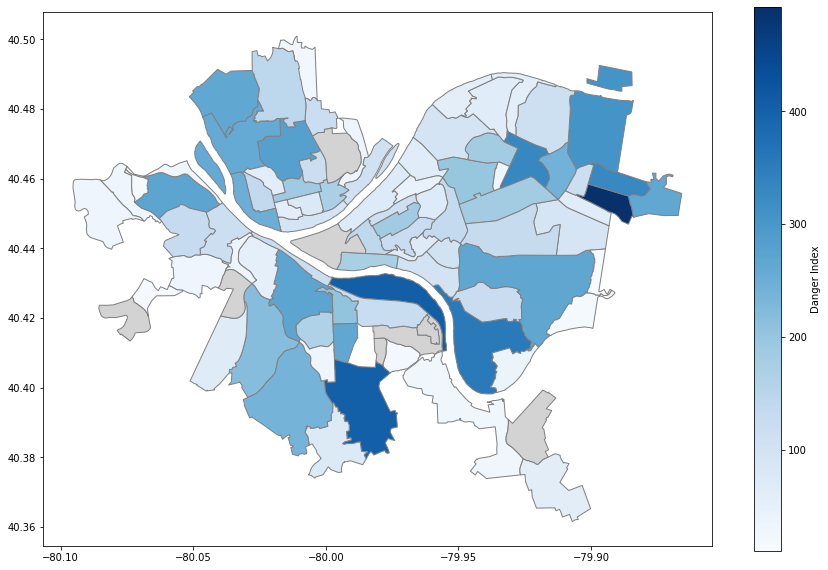

In [117]:
final_map = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
safety_map = final_map.merge(combined_dataframe, how='left', left_on='hood', right_on = 'neighborhood')
safety_map.plot(column="rank", # set the data to be used for coloring
               cmap='Blues',              # choose a color palette
               edgecolor="grey",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Danger Index"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data as lightgrey
               )

In [122]:
combined_dataframe.sort_values(['rank'], ascending = True).head()

,neighborhood,rank
66,Regent Square,10.288363
59,Oakwood,17.673171
82,Swisshelm Park,18.246453
20,Chartiers City,18.711382
78,St. Clair,20.295082


James: The "best" neighborhood by the safe metric is Regent Square! I was pretty surprised by the results, especially for my metric in particular (fire incidents). I did not realize how often fires are an issue in a city like this, coming from a small town myself. I was mostly shocked that the neighborhoods around Downtown were not much more dangerous. All and all, I know that if I'm highly flammable, I won't move to Carrick, and that the best place to be is probably on the North side. 

Victor: After analyzing the results of arrest data in Pittsburgh neighborhoods, I narrowed down the safest neighborhoods in Pittsburgh. Although Regent Square did not have the lowest arrest rate, it was among the top 5 safest neighborhoods with an arrests to population ratio of 0.029. Because of the low arrest rate, the neighborhood must be one of the safest. This data combined with firearm seizures and fires reinforce this idea as Regent Square ended up with the lowest Danger Index, making it the safest neighborhood in Pittsburgh. 

Luke: The "best" neighborhood is Regent Square based on our map and combined data. After working through my own submetric which was firearms seized, I thought the safest neighborhood would be the one with the least amount of gun violence. However, that proved to be incorrect as there are a multitude of factors that go into finding the "safest neighborhood". Although orginally I thought the safest neighborhood was Mt. Oliver as it had the least amount of firearm seizures, Regent Square had the least amount of dangerous factors overall. 